In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip time-series-attribution-master.zip
!mv time-series-attribution-master time-series-attribution

In [16]:
layers = ['0','-1','-2','-3']
captum_methods = ["Saliency", "IntegratedGradients", "InputXGradient", "GuidedBackprop", "LayerGradCam", "GuidedGradCam", "Lime"]
yiskw713_methods = ["GradCAMpp", "SmoothGradCAMpp", "ScoreCAM", "RISE"]
methods = captum_methods + yiskw713_methods
datasets = ["SyntheticAnomaly","CharacterTrajectories","FordA","ElectricDevices","Cricket","LargeKitchenAppliances","PhalangesOutlinesCorrect","NonInvasiveFetalECGThorax1","Wafer","Strawberry","TwoPatterns","Epilepsy","UWaveGestureLibraryAll"]

In [14]:
with open("/content/time-series-attribution/results/randomization_results.json", 'r') as myfile:
      data=myfile.read()
accs = json.loads(data)

dataset = "SyntheticAnomaly"
accs = accs[dataset]

### Plot spearman correlation coefficients

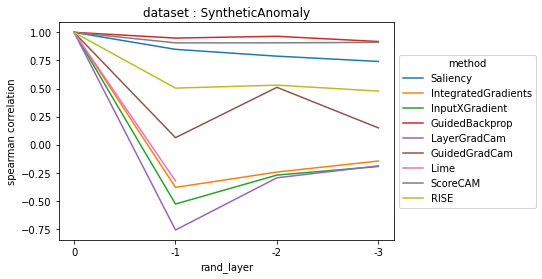

In [15]:
fig, axs = plt.subplots()

for method in methods:
  corr = []
  for layer in layers:
    tmp = accs[layer][method]["spearmanCorr"]
    if method in tmp: # since maps with NaN would be excluded
      corr.append(tmp[method])
  if len(corr) == len(layers):     # since maps with NaN would be excluded
    axs.plot(range(len(layers)), corr, label=method)

axs.set_ylabel("spearman correlation")
axs.set_xlabel("rand_layer")
axs.set_xticks(range(len(layers)))
axs.set_xticklabels(layers)
plot_title = "dataset : " + dataset
axs.set_title(plot_title)
axs.legend(title="method",loc='center left', bbox_to_anchor= (1.0, 0.5))
plt.show()

### Generate correlation matrix

In [ ]:
corrs = {}
for method in methods:
  corrs[method] = accs['0'][method]["spearmanCorr"]

corrs = pd.DataFrame(corrs)
corrs.dropna(how="all", inplace=True)
corrs.dropna(how="all", axis=1, inplace=True)

In [ ]:
corr = corrs.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Saliency,IntegratedGradients,InputXGradient,GuidedBackprop,LayerGradCam,GuidedGradCam,Lime,ScoreCAM,RISE
Saliency,1.000,-0.215,-0.214,-0.188,-0.302,-0.167,-0.109,0.130,-0.254
IntegratedGradients,-0.215,1.000,0.958,-0.299,-0.189,-0.299,-0.172,-0.286,-0.232
InputXGradient,-0.214,0.958,1.000,-0.311,-0.178,-0.311,-0.169,-0.283,-0.230
GuidedBackprop,-0.188,-0.299,-0.311,1.000,-0.282,0.997,-0.177,-0.344,-0.322
LayerGradCam,-0.302,-0.189,-0.178,-0.282,1.000,-0.307,-0.163,0.061,0.324
GuidedGradCam,-0.167,-0.299,-0.311,0.997,-0.307,1.000,-0.174,-0.338,-0.329
Lime,-0.109,-0.172,-0.169,-0.177,-0.163,-0.174,1.000,-0.178,-0.174
ScoreCAM,0.130,-0.286,-0.283,-0.344,0.061,-0.338,-0.178,1.000,0.382
RISE,-0.254,-0.232,-0.230,-0.322,0.324,-0.329,-0.174,0.382,1.000


### Plot pearson correlation coefficients

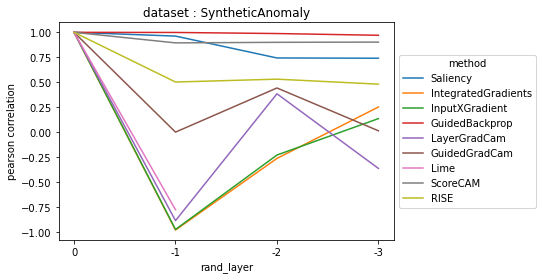

In [ ]:
fig, axs = plt.subplots()

for method in methods:
  corr = []
  for layer in layers:
    tmp = accs[layer][method]["pearsonCorr"]
    if method in tmp: # since maps with NaN would be excluded
      corr.append(tmp[method])
  if len(corr) == len(layers):     # since maps with NaN would be excluded
    axs.plot(range(len(layers)), corr, label=method)

axs.set_ylabel("pearson correlation")
axs.set_xlabel("rand_layer")
axs.set_xticks(range(len(layers)))
axs.set_xticklabels(layers)
plot_title = "dataset : " + dataset
axs.set_title(plot_title)
axs.legend(title="method",loc='center left', bbox_to_anchor= (1.0, 0.5))
plt.show()

### Generate correlation matrix

In [ ]:
corrs = {}
for method in methods:
  corrs[method] = accs['0'][method]["pearsonCorr"]

corrs = pd.DataFrame(corrs)
corrs.dropna(how="all", inplace=True)
corrs.dropna(how="all", axis=1, inplace=True)

In [ ]:
corr = corrs.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Saliency,IntegratedGradients,InputXGradient,GuidedBackprop,LayerGradCam,GuidedGradCam,Lime,ScoreCAM,RISE
Saliency,1.000,0.522,0.517,-0.560,0.650,-0.524,-0.229,0.019,-0.041
IntegratedGradients,0.522,1.000,0.999,-0.931,0.114,-0.963,-0.034,-0.011,-0.038
InputXGradient,0.517,0.999,1.000,-0.934,0.092,-0.951,-0.038,-0.016,-0.044
GuidedBackprop,-0.560,-0.931,-0.934,1.000,-0.198,0.925,-0.078,-0.120,-0.095
LayerGradCam,0.650,0.114,0.092,-0.198,1.000,-0.190,-0.246,-0.062,-0.057
GuidedGradCam,-0.524,-0.963,-0.951,0.925,-0.190,1.000,-0.075,-0.090,-0.070
Lime,-0.229,-0.034,-0.038,-0.078,-0.246,-0.075,1.000,-0.179,-0.176
ScoreCAM,0.019,-0.011,-0.016,-0.120,-0.062,-0.090,-0.179,1.000,0.269
RISE,-0.041,-0.038,-0.044,-0.095,-0.057,-0.070,-0.176,0.269,1.000
